## Part 1: Implementation
Implement spectral clustering function from scratch (for two clusters), taking as input the dataset. It must return the predicted clustering. Assume that the graph constructed is a fully connected graph. Use the normalized graph laplacian for this case.



In [2]:
from sklearn.cluster        import KMeans
from sklearn.neighbors      import kneighbors_graph
from scipy.spatial.distance import pdist, squareform
from scipy.sparse.csgraph   import laplacian
import numpy as np


"""Args:
X: input samples, array (num, dim)
n_clusters:   no. of clusters
n_neighbours: neighborhood size

Returns:
Y: labels for samples, array (num,)
"""
def spectral_clustering(X, n_clusters=2, n_neighbors=10):
    n, d = X.shape
    A = kneighbors_graph(X, n_neighbors, mode='connectivity').toarray()
    L = laplacian(A, normed=True)
    w, v = np.linalg.eig(L)
    w, v = w.real, v.real
    i = np.argsort(w)
    w, v = w[i], v[:,i]
    Y = KMeans(n_clusters).fit_predict(v[:,:2])
    return Y


## Part 2: Clustering concentric circles
Perform spectral clustering on the concentric circles dataset. Visualize the result by plotting it on a 2-d graph. Use different colours for different clusters.

In [3]:
from sklearn.datasets import make_circles 

CX, CY = make_circles(n_samples=200, shuffle=True,noise=0.05, random_state=1337, factor=0.5)
# CX: input data points [n_samples, 2]
# CY: true clusters [n_samples]

<IPython.core.display.Javascript object>


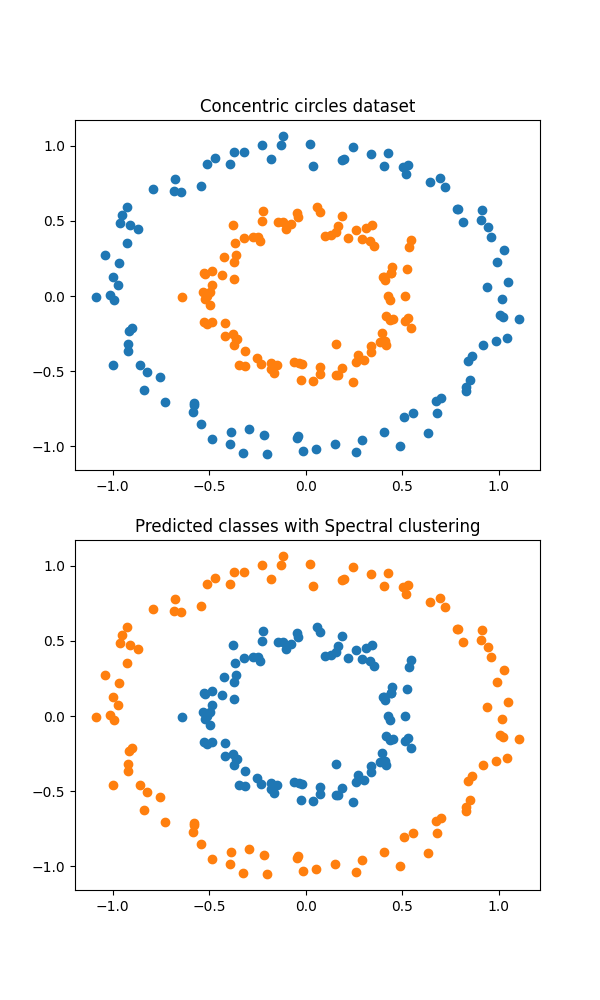

In [5]:
# Part 2: Perform Spectral Clustering on the concentric circles dataset
# Plot using colors from CY (true clusters) and CY_pred (predicted clusters)
# Code in this cell should plot 2 subplots (true labels and predicted labels)
from matplotlib import pyplot as plt
%matplotlib notebook

C0 = CX[CY == 0]
C1 = CX[CY == 1]

DY = spectral_clustering(CX)
D0 = CX[DY == 0]
D1 = CX[DY == 1]

fig = plt.figure(figsize=(6, 10))
axi = fig.add_subplot(211)
axi.scatter(C0[:,0], C0[:,1], label='Actual 0')
axi.scatter(C1[:,0], C1[:,1], label='Actual 1')
axi.title.set_text('Concentric circles dataset')

axi = fig.add_subplot(212)
axi.scatter(D0[:,0], D0[:,1], label='Predicted 0')
axi.scatter(D1[:,0], D1[:,1], label='Predicted 1')
axi.title.set_text('Predicted classes with Spectral clustering')

## Part 3: Evaluate accuracy
Evaluate the accuracy of the clustering by comparing it with the true labels. Create two subplots (true vs predicted) with the color of each point showing the cluster label.

In [6]:
# Part 3: Report the accuracy of clustering
ep = np.linalg.norm(DY - CY) / CY.shape[0]        # same class?
en = np.linalg.norm((1 - DY) - CY) / CY.shape[0]  # reversed class?
e = min(ep, en)                                         # it is ok if classes get reversed
print('Accuracy of Spectral clustering: %.2f' % (1-e))  # accuracy = 1-error

Accuracy of Spectral clustering: 1.00
